# How to test a ML-model using the model_tester.py package

In this guide we will go through how to test a ML-model in a standardized way. We will use the **model_tester.py** package, which is best adapted to sklearn implementations of models. However, one can also test other models with a few extra steps.

# Importing the data
Before we start we need to import the data!

In [1]:
# import the relevant package
from utils.import_data import importData

In [2]:
# The name of the files to be imported
file_data = "data2.csv"
file_labels = "labels2.csv"

# How many of the 3851 features that should be selected (-1 <=> all)
n_features = -1

# The folder the files lies in
directory = "\data\\"

# Import the data
data, labels = importData(file_data, file_labels, directory, n_features, iterations=False)

Number of samples:    102400
Number of features:   3851


# sklearn models
We're now ready to test some models! We'll start by looking at sklearn models, as they are more suitable for this package.

For this guide we will use a nearest neighbor classifier as it's a simple and fast classifier.

In [3]:
# import the model
from sklearn.neighbors import KNeighborsClassifier

This is how we import the **model_tester** package:

In [4]:
# import the package
from utils.model_tester import ModelTester

The ModelTester-class takes in the following parameters:
1. **x**                - the data
2. **y**                - the labels
3. **model_function**   - the function used to initialize the ML-model
4. **model_parameters** - the parameters used for the model_function, i.e. model_function(**model_parameters)

Let's have a look at an example of initializing the class!

In [5]:
# initialize the model
mt = ModelTester(data, labels, KNeighborsClassifier, n_neighbors = 3)

Let's see if it was initialized correctly

In [6]:
print(mt.model(**mt.parameters))

KNeighborsClassifier(n_neighbors=3)


It was!

In order to train the model we use the method **trainin_loop()**. It takes in the following parameters:
1. **n_train** - how many iterations of data it should be trained on
2. **n_test** - how many iterations of data it should be tested on
3. **iter_lags** - a list of how many iterations there should be between the training and test data
4. **sampling** - 'under', 'over' or None, which kind of sampling that should be done
5. **starting_iters** - a list of from where in the data set the data should be selected
6. **seed** - randomizer
7. **printing** - if some helpful information should be printed during training
8. **transformer** - a transformation that will be performed on the data, e.g. PCA

Don't worry! All these have default values, so you don't need to touch them if you don't want to.

In [7]:
# run the training loop
mt.training_loop()

If you want to look at the results we can use the following method: **.print_essentials()**

It takes in the following parameters:
1. **run** - from which iter_lag the results should be printed from. default is the first (0)
2. **test** - if test should be used
3. **alpha** - the confidence for the CI
4. **n_sf** - the number of significant figures
5. **results_path** - where (and if) the results should be saved to a file

**NOTE** all parameters are optional

In [8]:
# printing the results
mt.print_essentials()

Results: 

variable                             average    std  95.0% CI          min    max
---------------------------------  ---------  -----  --------------  -----  -----
weighted accuracy [%]                  49.65   1.2   (48.79, 50.51)  47.23  51.73
duration [s]                            0.54   0.01  (0.53, 0.55)     0.53   0.57
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)  77.25  85.45
infeasible_guessed_percentage [%]      35.62  14.46  (25.27, 45.96)  14.84  54.79
feasible_recall [%]                    63.8   14.92  (53.12, 74.47)  42.11  85.45
feasible_precision [%]                 17.26   2.56  (15.43, 19.09)  13.74  22.65
infeasible_recall [%]                  35.5   14.41  (25.19, 45.81)  14.91  54.86
infeasible_precision [%]               82.33   2.47  (80.56, 84.09)  76.92  86
auc of roc                              0.51   0.02  (0.5, 0.52)      0.48   0.53


If we want to look at some plots we can use the plot_graphs() method. 

It takes in the following parameters:
1. **error_choice** - which kind of error that should be used for the error bars in the graphs ('std', '95CI' or min/max)
2. _printing parameters_ - if the different graphs should be plotted (one parameter per graph)

One can also import the package **nice_plots** to make the plots prettier.

Weighted accuracies:


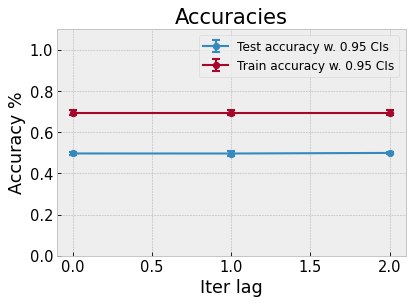

Test accuracies: [0.49649393 0.49627033 0.49909172]
Confusion matrices:


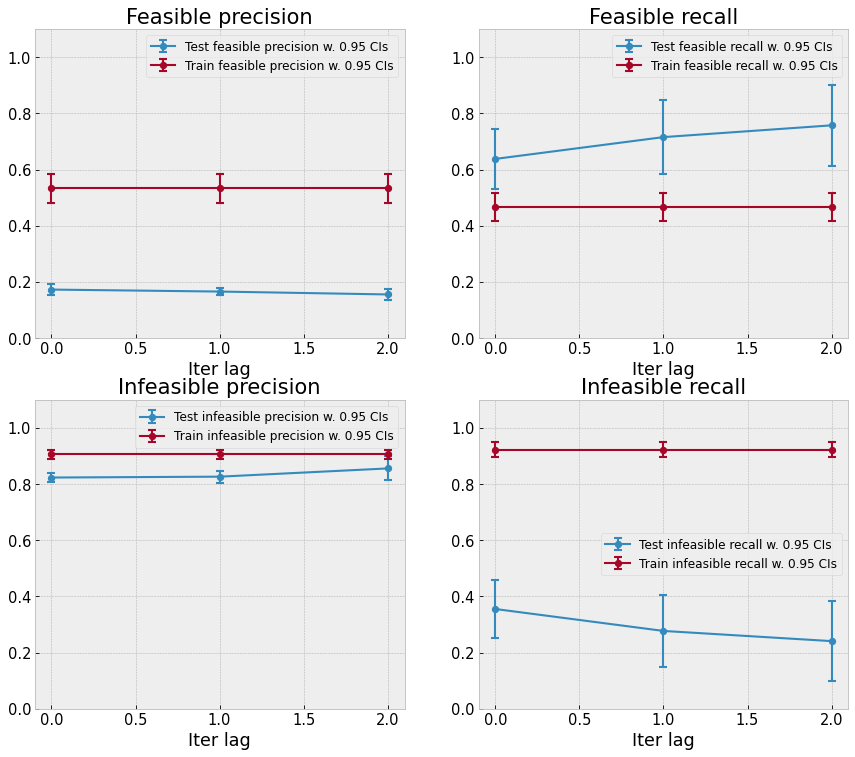

Percentage infeasible on test and train data:


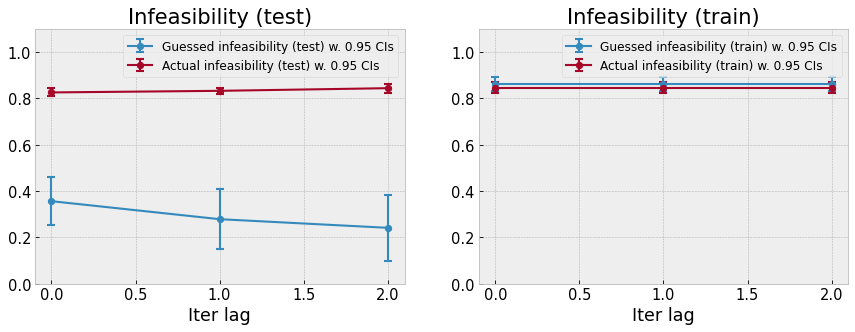

AUC:


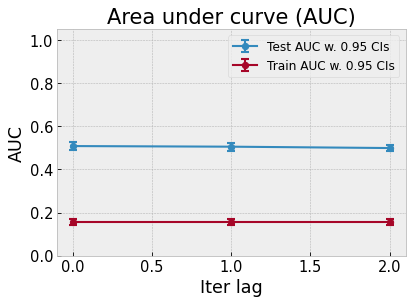

In [9]:
# make the plots prettier
import utils.nicer_plots

# plotting the results
mt.plot_graphs()

# Hyperparameter tuning
We now want to tune the hyperparameters for the model in order to get better results. For this we can use the method **hyperparameter_tuning()** (or **hyperparameter_tuning_CV**(), an old version only for sklearn models.)

The function tests every combination of parameters a given number of times. It then evaluates the combinations with balanced_accuracy or AUC.

It takes in the following parameters:
1. **n_train** - how many iterations of data that should used for training the model
2. **n_test** - how many iterations of data that should used for testing the model
3. **n_epochs** - how many times every combination will be tested
4. **score** - which score that should be used to evaluate the model, balanced_accuracy or AUC
5. **update_parameters** - whether or not the best parameters should be saved into the object
6. **sampling** - which kind of sampling the should be performed, same options as above
7. **seed** - randomizer
8. **progressbar** - whether or not a progressbar should be shown during training
9. **parameters** - lists with the values that should be tried for every parameters

**NOTE** parameters 3-8 are optional

In [10]:
# the following code does a grid search for a nearest neighbor classifier for the values 
# k = 1 to 5. it evaluates it on 2 iterations worth of data (before sampling)

mt.hyperparameter_tuning(n_train = 2, n_test = 1, n_epochs = 2, n_neighbors = [1, 2, 3])

100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


   Ranking    n_neighbors    balanced_accuracy    Standard deviation
---------  -------------  -------------------  --------------------
        1              1             0.515146             0.0154314
        2              2             0.499545             0.010728
        3              3             0.489568             0.0141547


{'n_neighbors': 1}

The results show that k = 1 was the best parameter value of the 3 given choices. If we want, we could now rerun the trainin_loop() method.

We should also have a look at the results above.

In [11]:
# the parameters are now updated
mt.parameters

{'n_neighbors': 1}

# non-sklearn models
We can also test non-sklearn models, but for this we need some extra steps:

1. define the model class
2. (optional) add extra attributes to the ModelTester-object if needed
3. define a custom training function
4. define a custom prediction function
5. define a custom probability prediction function

we will give an example of this below
_see notebook 03 for another example_

**or**

1. define the model class an sklearn-model. define the following methods
    1. .fit()
    2. .predict()
    3. .predict_proba()

_see notebook 02 for an example_


For this example we will use a simple linear neural network. Let's define the model class.

**STEP 1**

In [12]:
# a NN with 6 layers

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(3851, 1200).double()
        self.fc2 = nn.Linear(1200, 600).double()
        self.fc3 = nn.Linear(600, 300).double()
        self.fc4 = nn.Linear(300, 150).double()
        self.fc5 = nn.Linear(150, 84).double()
        self.fc6 = nn.Linear(84, 2).double()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

We now need to define some extra attributes the custom functions will need. We end these with a '_' to not interfere with previously defined attirbutes.

**STEP 2**

In [13]:
# initialize a new model tester
mt_custom = ModelTester(data, labels, Net)

# define the new attributes
mt_custom.optimizer_ = torch.optim.Adam
mt_custom.criterion_ =  torch.nn.CrossEntropyLoss
mt_custom.n_epochs_ = 10
mt_custom.lr_ = 0.07

We now need to define the custom training function. It needs 3 inputs variabels:
1. **self** - the ModelTester object
2. **x** - data
3. **y** - labels

And it needs to return the trained model

**STEP 3**

In [14]:
# the custom training function

def custom_training(self, x, y):
    model = self.model()
    
    optimizer = self.optimizer_(model.parameters(), self.lr_)
    criterion = self.criterion_()

    X_train = torch.from_numpy(x)
    y_train = torch.from_numpy(y)

    y_train = y_train.type(torch.LongTensor)

    for epoch in range(self.n_epochs_):
        X_train, y_train = torch.autograd.Variable(X_train), torch.autograd.Variable(y_train)

        model.train()

        optimizer.zero_grad()

        output_train = model(X_train)

        loss_train = criterion(output_train, y_train)

        loss_train.backward()
        optimizer.step()

        # print("\t\tSub-epoch", epoch, "complete")

    return model
        


Now it's time to define the custom prediction function. It needs to take in three parameters:
1. **self** - the ModelTester object
2. **x** - data
3. **model** - a trained model instance

It needs to return a numpy array with the predicted labels

**STEP 4**

In [15]:
# the custom prediction function

def custom_prediction(self, x, model):
    x = torch.from_numpy(x)
    probabilities = model(x)
    pred_train = probabilities # For detaching
    y_pred = np.argmax(pred_train.detach().numpy(), axis=1)

    return y_pred

Finally, it's time to define the custom probability prediction function. Like the previous custom function, it needs to take in three parameters:
1. **self** - the ModelTester object
2. **x** - data
3. **model** - a trained model instance

It needs to return a numpy array with the probabilites for the feasible class

**STEP 5**

In [16]:
def custom_predict_proba(self, x, model):
    x = torch.from_numpy(x)
    probabilities = model(x)
    pred_train = probabilities # For detaching
    return pred_train.detach().numpy()[:, 0]

Now we need to save these custom functions using the set_custom_functions() method.

In [17]:
mt_custom.set_custom_functions(custom_train_model=custom_training, custom_prediction=custom_prediction, custom_predict_proba=custom_predict_proba)

And now we can train the model!

In [18]:
mt_custom.training_loop(n_train = 2, n_test = 1)

The rest is the same as for sklearn models:

In [19]:
mt_custom.print_essentials()

Results: 

variable                             average    std  95.0% CI           min     max
---------------------------------  ---------  -----  --------------  ------  ------
weighted accuracy [%]                  50      0     (50.0, 50.0)     50      50
duration [s]                            2.4    0.05  (2.37, 2.44)      2.33    2.49
infeasible_percentage [%]              84.71   3.18  (82.43, 86.98)   79.69   89.55
infeasible_guessed_percentage [%]     100      0     (100.0, 100.0)  100     100
feasible_recall [%]                     0      0     (0.0, 0.0)        0       0
feasible_precision [%]                  0      0     (0.0, 0.0)        0       0
infeasible_recall [%]                 100      0     (100.0, 100.0)  100     100
infeasible_precision [%]               84.71   3.18  (82.43, 86.98)   79.69   89.55
auc of roc                              0.53   0.05  (0.5, 0.57)       0.5     0.64


Weighted accuracies:


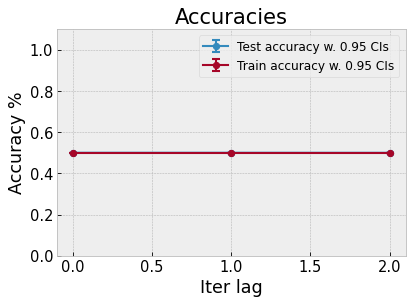

Test accuracies: [0.5        0.5        0.49976879]
Confusion matrices:


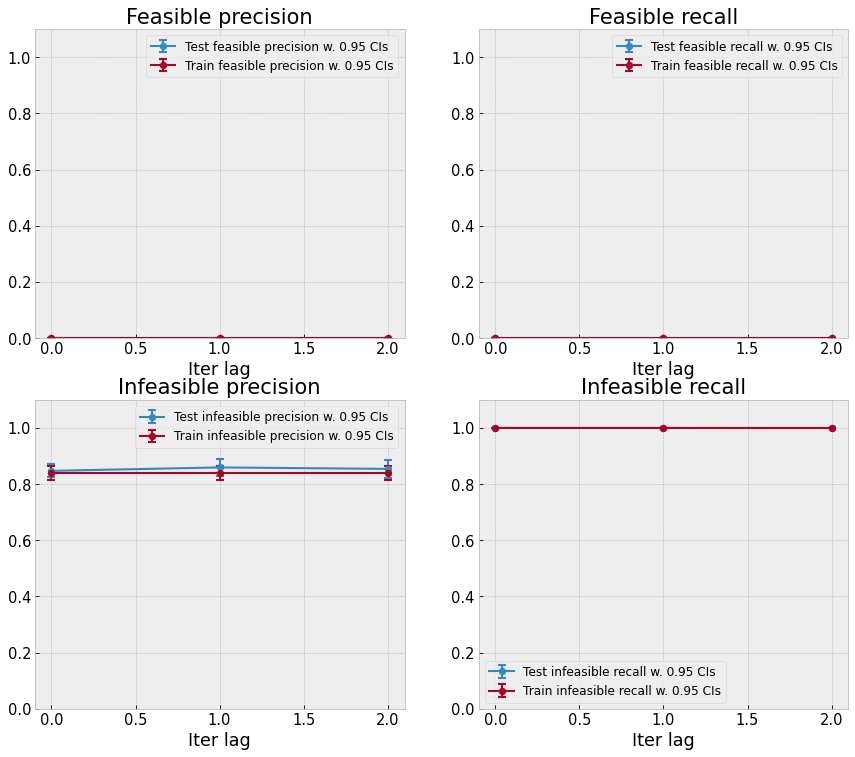

Percentage infeasible on test and train data:


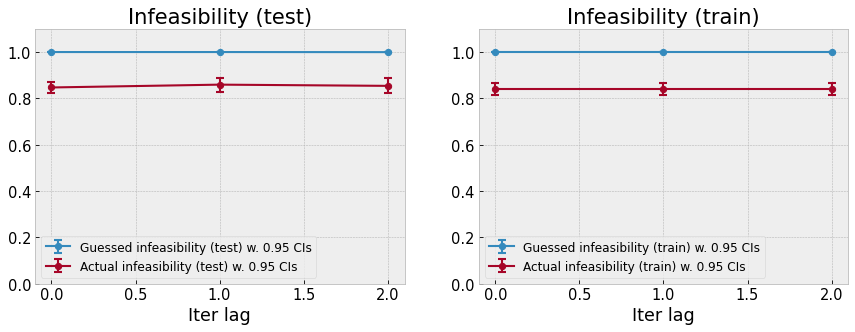

AUC:


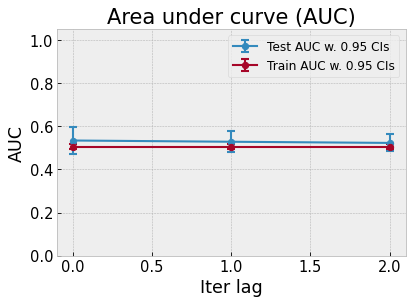

In [20]:
mt_custom.plot_graphs()

Hyperparameter tuning is performed exactly like above (as for sklearn-models).

**Happy testing!**